## Fictional Character Battle Outcome Prediction
### 
Predicting the outcomes of epic battles between iconic fictional characters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

In [2]:
df = pd.read_csv('C:/Users/odhia/OneDrive/Desktop/mlopsProjects/notebook/data/fictional_character_battles_complex.csv')
df.head()

,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,BattleOutcome
0,Wonder Woman,Marvel,7,8,3,Telekinesis,Kryptonite,0
1,Iron Man,Marvel,4,7,9,Telekinesis,Kryptonite,0
2,Iron Man,DC Comics,8,7,5,Telekinesis,Magic,0
3,Spider-Man,DC Comics,5,6,10,Telekinesis,Kryptonite,0
4,Flash,Marvel,7,6,2,Invisibility,Magic,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Character         2351 non-null   object
 1   Universe          2351 non-null   object
 2   Strength          2351 non-null   int64 
 3   Speed             2351 non-null   int64 
 4   Intelligence      2351 non-null   int64 
 5   SpecialAbilities  2351 non-null   object
 6   Weaknesses        2351 non-null   object
 7   BattleOutcome     2351 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 147.1+ KB


In [4]:
df.isna().sum()

Character           0
Universe            0
Strength            0
Speed               0
Intelligence        0
SpecialAbilities    0
Weaknesses          0
BattleOutcome       0
dtype: int64

In [5]:
df.duplicated().sum()

6

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.describe()

,Strength,Speed,Intelligence,BattleOutcome
count,2345.000000,2345.000000,2345.000000,2345.000000
mean,5.441365,5.481450,5.550107,0.278038
std,2.896110,2.858841,2.861892,0.448128
min,1.000000,1.000000,1.000000,0.000000
25%,3.000000,3.000000,3.000000,0.000000
50%,5.000000,6.000000,6.000000,0.000000
75%,8.000000,8.000000,8.000000,1.000000
max,10.000000,10.000000,10.000000,1.000000


In [8]:
df.columns = df.columns.str.lower()

In [9]:
df.columns

Index(['character', 'universe', 'strength', 'speed', 'intelligence',
       'specialabilities', 'weaknesses', 'battleoutcome'],
      dtype='object')

## character-Categorical variable representing the name of the fictional character.

In [10]:
df.character.value_counts()

character
Wonder Woman       310
Superman           307
Iron Man           306
Thor               298
Flash              293
Batman             279
Spider-Man         276
Captain America    276
Name: count, dtype: int64

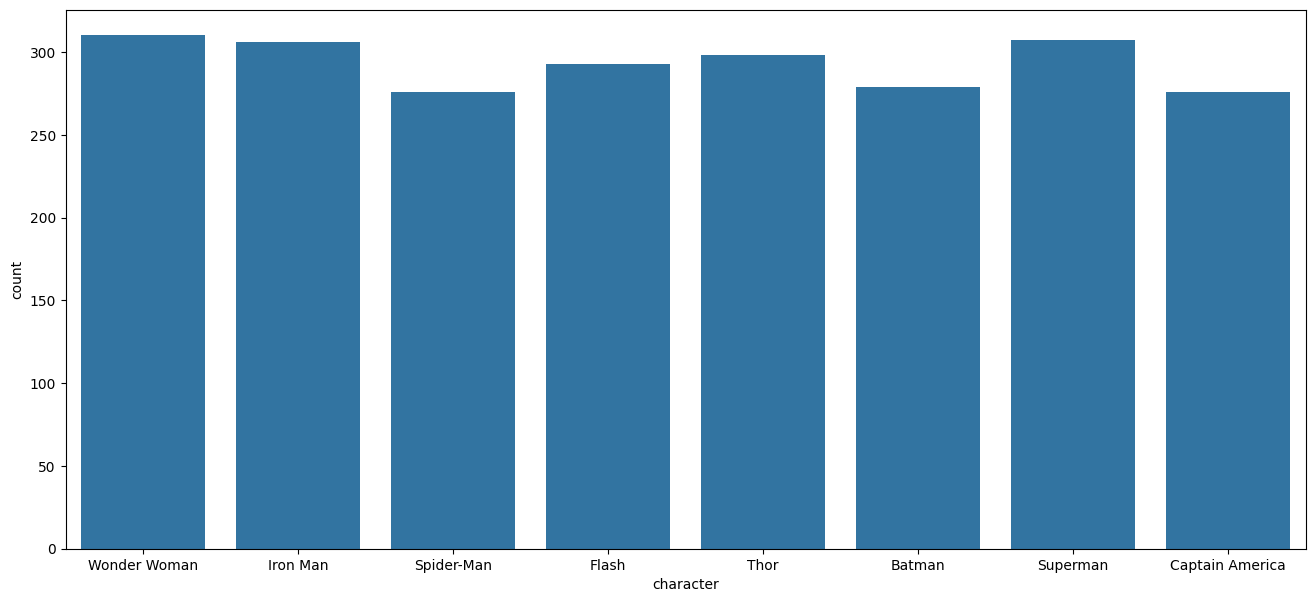

In [11]:
plt.figure(figsize=(16,7))
sns.countplot(x=df.character)
plt.show()

## Universe: Categorical variable representing the universe or franchise from which the character originates.

In [12]:
df.universe.value_counts()

universe
Marvel       1191
DC Comics    1154
Name: count, dtype: int64

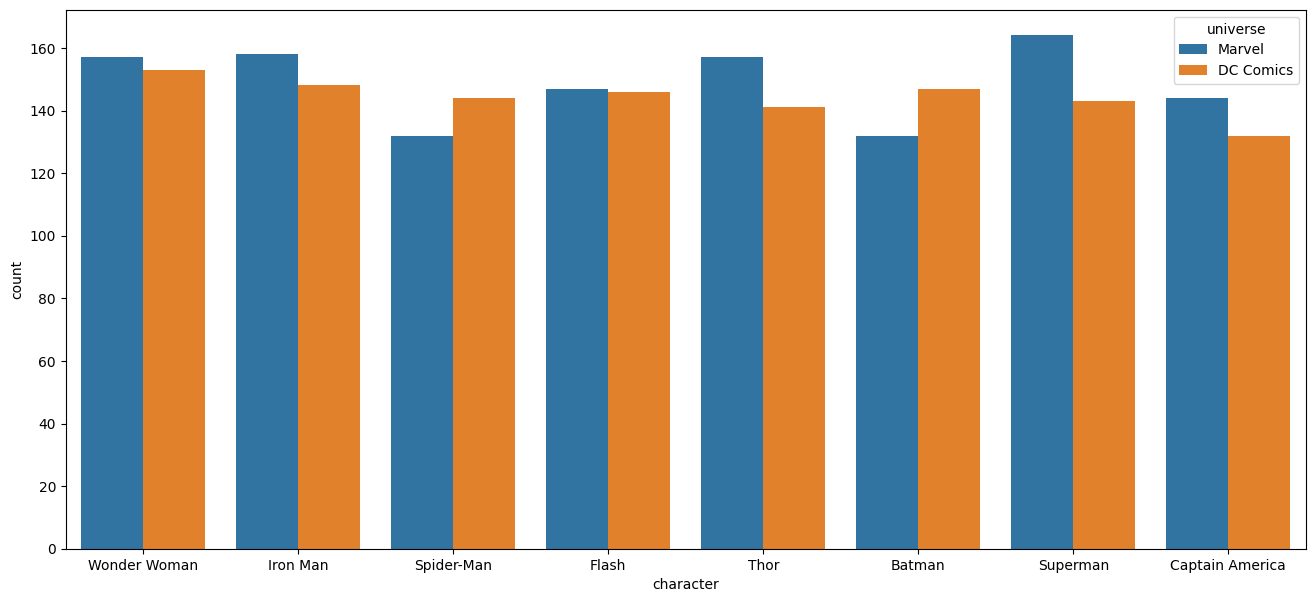

In [13]:
plt.figure(figsize=(16,7))
sns.countplot(x=df.character,hue = df.universe)
plt.show()


## strength character's physical strength on a scale from 1 to 10.

<Axes: xlabel='strength', ylabel='Count'>

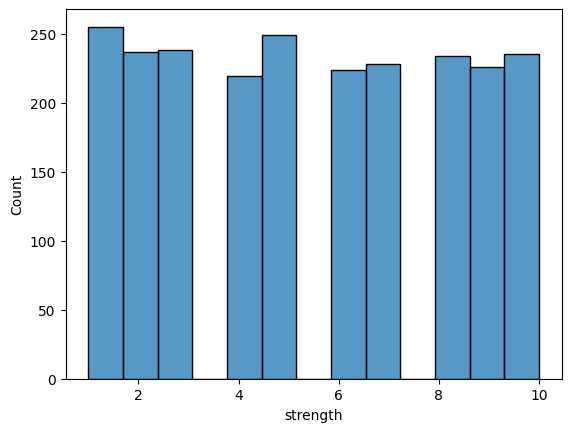

In [14]:
sns.histplot(x=df.strength)

## speed character's speed or agility on a scale from 1 to 10.

<Axes: xlabel='speed', ylabel='Count'>

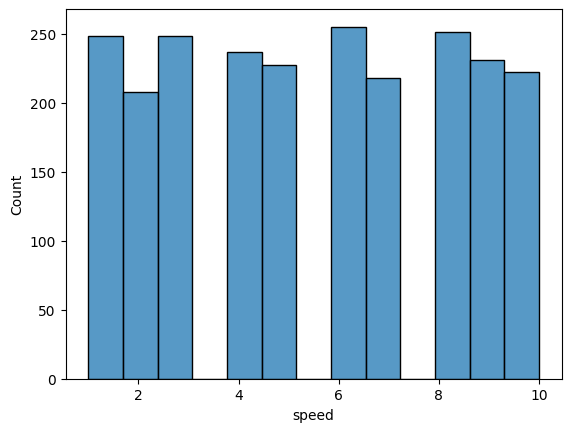

In [15]:
sns.histplot(x=df.speed)

## intelligence character's intelligence or strategic thinking on a scale from 1 to 10

<Axes: xlabel='intelligence', ylabel='Count'>

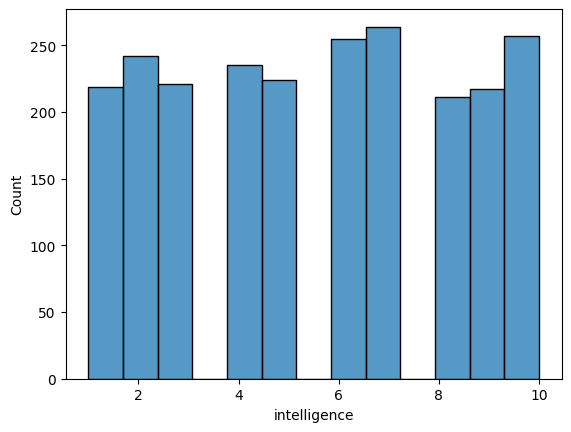

In [16]:
sns.histplot(x=df.intelligence)

## specialabilities Categorical variable representing special powers or abilities possessed by the character.

In [17]:
df.specialabilities.value_counts()

specialabilities
Invisibility      611
Flight            592
Telekinesis       572
Super Strength    570
Name: count, dtype: int64

<Axes: xlabel='specialabilities', ylabel='count'>

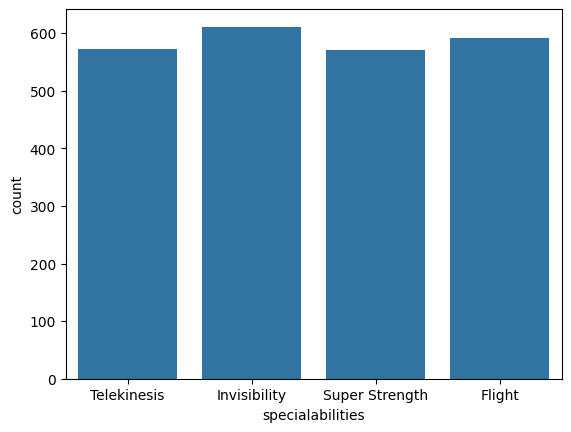

In [18]:
sns.countplot(x=df.specialabilities)

## weaknesses Categorical variable representing vulnerabilities or weaknesses of the character

In [19]:
df.weaknesses.value_counts()

weaknesses
Kryptonite      636
Wooden Stake    590
Magic           562
Silver          557
Name: count, dtype: int64

<Axes: xlabel='weaknesses', ylabel='count'>

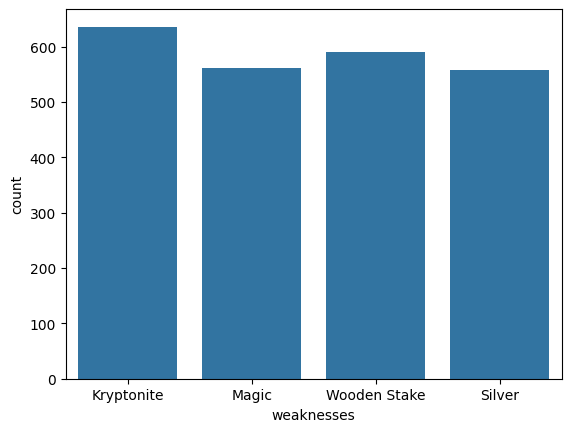

In [20]:
sns.countplot(x=df.weaknesses)

## battleoutcome ;Binary variable indicating the outcome of the battle.
Values: 1 (Character 1 wins), 0 (Character 2 wins).

In [21]:
df.battleoutcome.value_counts()

battleoutcome
0    1693
1     652
Name: count, dtype: int64

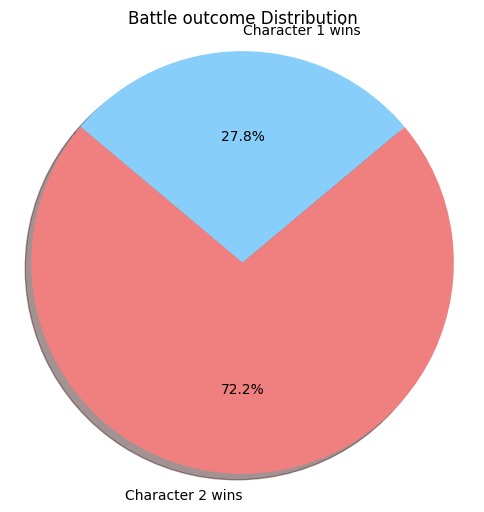

In [22]:
labels = ["Character 2 wins","Character 1 wins"]
sizes = df.battleoutcome.value_counts()
colors = ['lightcoral', 'lightskyblue']

plt.figure(figsize=(6,6)) 
plt.pie(sizes,labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.title('Battle outcome Distribution')
plt.show()

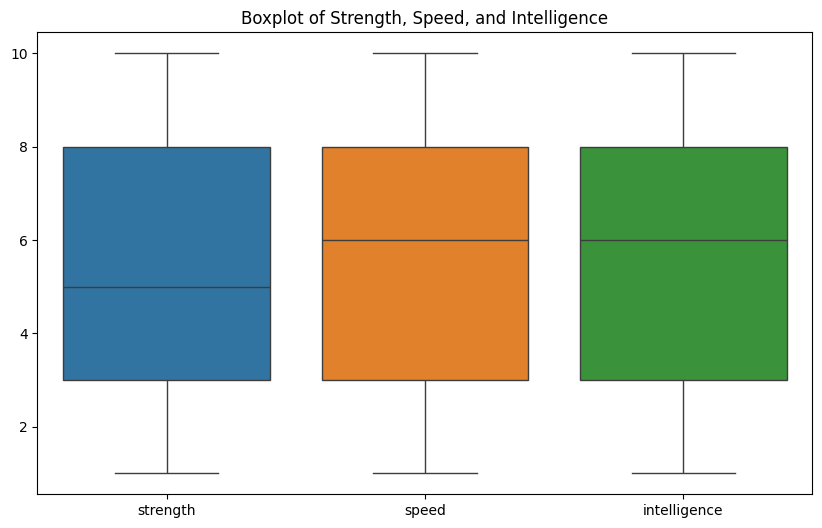

In [23]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['strength', 'speed', 'intelligence']])
plt.title("Boxplot of Strength, Speed, and Intelligence")
plt.show()

In [24]:
df.head()

,character,universe,strength,speed,intelligence,specialabilities,weaknesses,battleoutcome
0,Wonder Woman,Marvel,7,8,3,Telekinesis,Kryptonite,0
1,Iron Man,Marvel,4,7,9,Telekinesis,Kryptonite,0
2,Iron Man,DC Comics,8,7,5,Telekinesis,Magic,0
3,Spider-Man,DC Comics,5,6,10,Telekinesis,Kryptonite,0
4,Flash,Marvel,7,6,2,Invisibility,Magic,0


In [25]:
le = LabelEncoder()
df.character = le.fit_transform(df.character)
df.universe = le.fit_transform(df.universe)
df.specialabilities = le.fit_transform(df.specialabilities)
df.weaknesses = le.fit_transform(df.weaknesses)

In [26]:
df.head()

,character,universe,strength,speed,intelligence,specialabilities,weaknesses,battleoutcome
0,7,1,7,8,3,3,0,0
1,3,1,4,7,9,3,0,0
2,3,0,8,7,5,3,1,0
3,4,0,5,6,10,3,0,0
4,2,1,7,6,2,1,1,0


In [27]:
X = df.drop('battleoutcome',axis=1)
y = df.battleoutcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
models = {
    'Logistic Regression':LogisticRegression(),
    'SVC':SVC(),
    'KNeighbours':KNeighborsClassifier(),
    'Cat Boost':CatBoostClassifier(logging_level='Silent'),
    'XGB':XGBClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),  
}

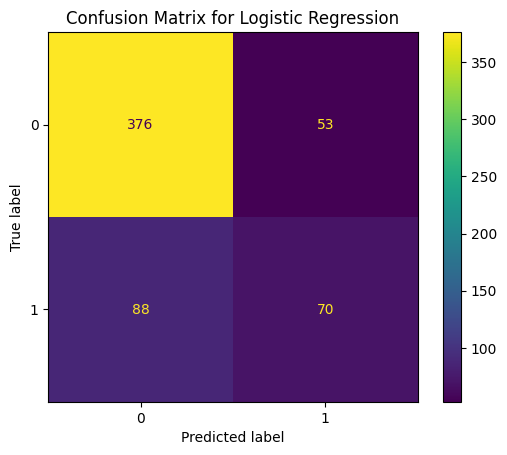

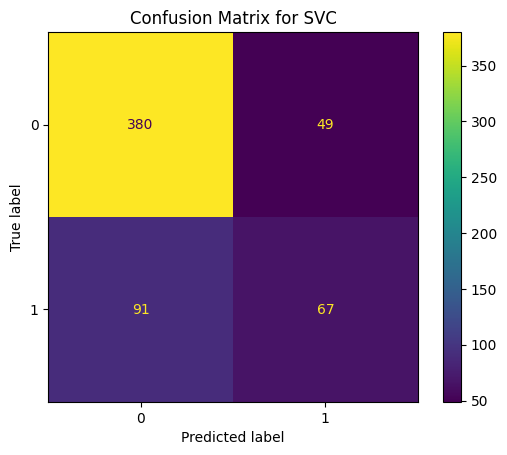

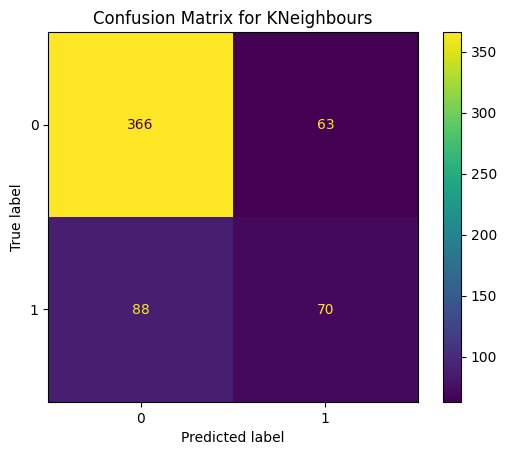

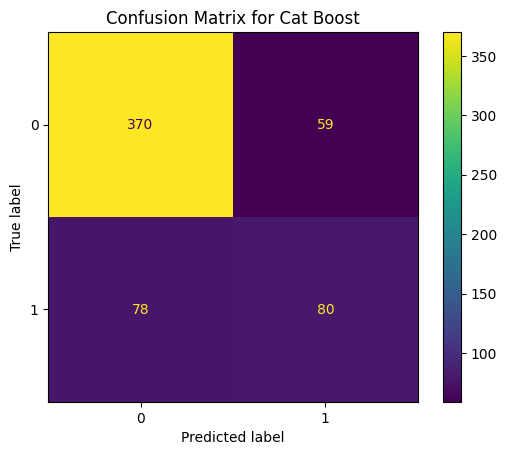

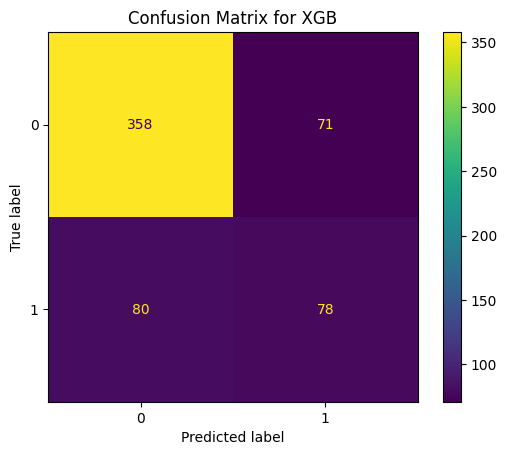

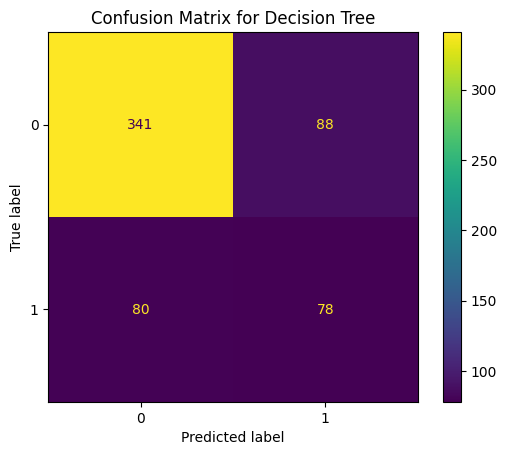

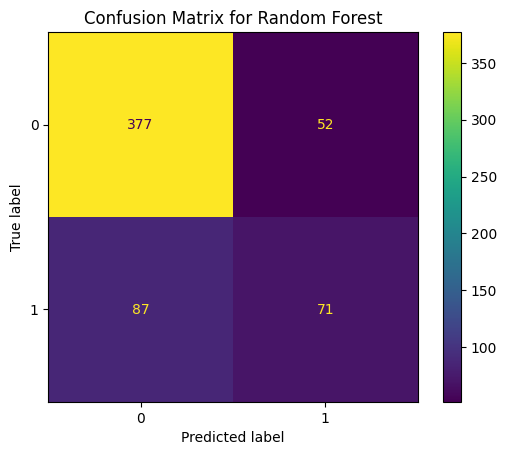

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.759796,0.689725,0.659747,0.670163
1,SVC,0.761499,0.692190,0.654916,0.666748
2,KNeighbours,0.742760,0.666242,0.648092,0.655046
3,Cat Boost,0.766610,0.700716,0.684400,0.691253
4,XGB,0.742760,0.670421,0.664085,0.666990
5,Decision Tree,0.713799,0.639928,0.644271,0.641917
6,Random Forest,0.763203,0.694868,0.664077,0.674841


In [29]:
# Initialize a DataFrame to store evaluation results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Train and evaluate models
evaluation_results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1_score = report['macro avg']['f1-score']
    
    # Append results to list
    evaluation_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score
    })
    
    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Create DataFrame from evaluation results
results = pd.DataFrame(evaluation_results)

# Display evaluation results in table form
results

In [32]:
best_model = results.loc[results['Accuracy'].idxmax()]


In [33]:
best_model

Model        Cat Boost
Accuracy       0.76661
Precision     0.700716
Recall          0.6844
F1 Score      0.691253
Name: 3, dtype: object

In [36]:
best_model_name = best_model.values[0]

In [37]:
classifier = models[best_model_name]

In [38]:
import pickle
file_path = 'C:/Users/odhia/OneDrive/Desktop/mlopsProjects/elements/model.pkl'
obj = classifier
with open (file_path,'wb') as file_obj:
            pickle.dump(obj,file_obj)

In [39]:
file_path = 'C:/Users/odhia/OneDrive/Desktop/mlopsProjects/elements/scaler.pkl'
obj = scaler
with open (file_path,'wb') as file_obj:
            pickle.dump(obj,file_obj)

In [40]:
file_path = 'C:/Users/odhia/OneDrive/Desktop/mlopsProjects/elements/encoder.pkl'
obj = le
with open (file_path,'wb') as file_obj:
            pickle.dump(obj,file_obj)